Optimizing and fitting a Desicion Tree (DT) to training dataset using cross validation and evaluating the final performance on test dataset

In [455]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [456]:

df = pd.read_csv('breast_cancer2.csv')
df = df.drop(['ID'], axis=1)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


In [457]:

data = df.to_numpy()
data.shape

(683, 10)

In [458]:

x = data[:, :-1]
y = data[:, -1]
x.shape, y.shape

((683, 9), (683,))

In [459]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
y_train.shape, y_test.shape

((478,), (205,))

Creating a 'DecisionTreeClassifier' object 


In [460]:

DT=DecisionTreeClassifier(max_depth=9,min_samples_split=4,class_weight="balanced",random_state=42)


calculating the 10-Fold cross validation scores of 'DT' on the training dataset

In [461]:

cross_val_score(DT,cv=10,X=x_train,y=y_train)


array([0.9375    , 0.97916667, 0.91666667, 0.95833333, 0.95833333,
       0.9375    , 1.        , 0.95833333, 0.9787234 , 0.89361702])

Fitting 'DT' to training dataset and find the predictions on test data.

In [462]:

DT.fit(x_train,y_train)
predictions=DT.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0], dtype=int64)


Finding the accuracy of the classifier 'DT' on the test dataset

In [463]:

np.mean(predictions==y_test)

0.9560975609756097

In [464]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9]
min_samples_splits = [2, 4, 6, 8, 10]
class_weights = [None, 'balanced']

 
Calculating **the mean** of 10-Fold cross validation scores of each classifier on the training dataset using the method 'cross_val_score'.  
Repeating the above process and find the triple which gives the best mean cross validation score.

In [465]:

triples=[]
for i in range(len(max_depths)):
    for j in range(len(min_samples_splits)):
        for k in range(2):
            DT=DecisionTreeClassifier(max_depth=max_depths[i],min_samples_split=min_samples_splits[j],class_weight=class_weights[k],random_state=42)
            score=cross_val_score(DT,cv=10,X=x_train,y=y_train)
            triple=[max_depths[i],min_samples_splits[j],class_weights[k],np.mean(score)]
            triples.append(triple)
triples=np.array(triples)

best_mean_cross_val=triples[np.argmax(triples[:, 3])]
best_mean_cross_val


array([5, 6, 'balanced', 0.9644060283687944], dtype=object)


Fitting 'DT' to training dataset with the best triple 
Finding the predictions and the accuracy of 'DT' 

In [466]:

DT=DecisionTreeClassifier(max_depth=best_mean_cross_val[0],min_samples_split=best_mean_cross_val[1],class_weight=best_mean_cross_val[2],random_state=42)
DT.fit(x_train,y_train)
predictions=DT.predict(x_test)
accuracy=np.mean(predictions==y_test)
accuracy


0.9609756097560975

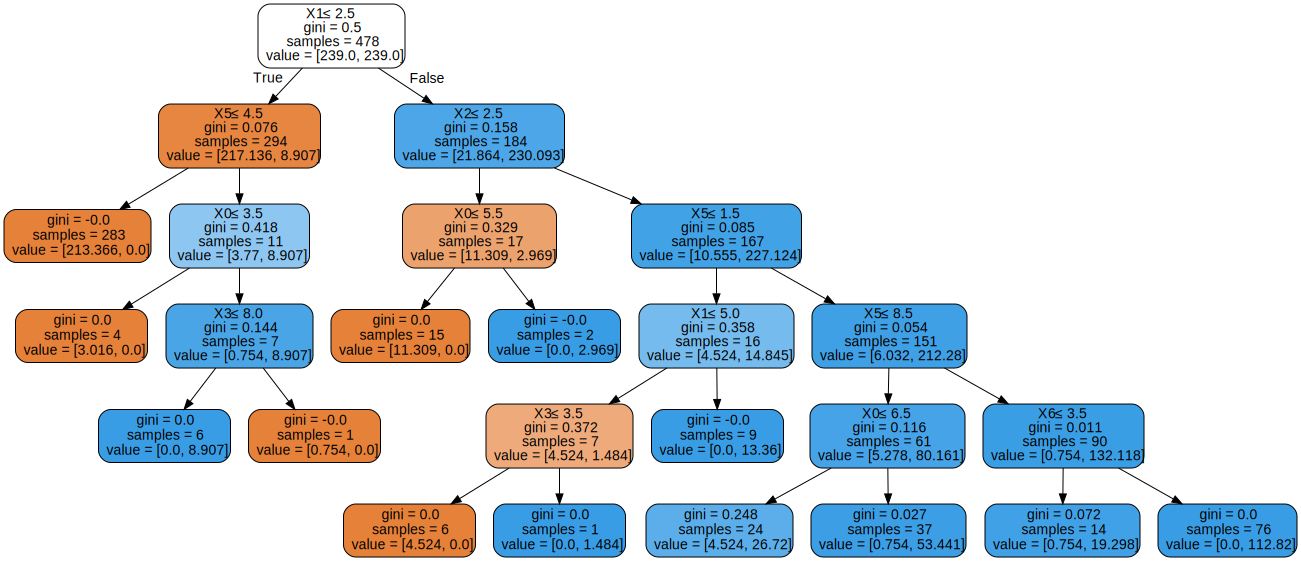

In [467]:

dot_data = export_graphviz(DT, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 